<a href="https://colab.research.google.com/github/HarshalPawar88/Evaluation-Projects/blob/main/Avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Avacado Project**
## **Problem Statement:**
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation\
AveragePrice - the average price of a single avocado\
type - conventional or organic\
year - the year\
Region - the city or region of the observation\
Total Volume - Total number of avocados sold\
4046 - Total number of avocados with PLU 4046 sold\
4225 - Total number of avocados with PLU 4225 sold\
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Data Trained/Data Trained Projects/avocado.csv')

In [7]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


# Dropping the column 'Unnamed' as it is of no importance.

In [8]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
type(df['Date'][0])

str

In [12]:
from datetime import datetime
import calendar
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['day']=df.Date.apply(lambda x : x.day)
df['week_day']=df.Date.apply(lambda x : calendar.day_name[x.weekday()])
df['month']=df.Date.apply(lambda x : x.month)
df['year']=df.Date.apply(lambda x : x.year)

In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,day,week_day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,Sunday,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,Sunday,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,Sunday,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,Sunday,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,Sunday,11


In [15]:
df.day.unique()

array([27, 20, 13,  6, 29, 22, 15,  8,  1, 25, 18, 11,  4, 30, 23, 16,  9,
        2, 26, 19, 12,  5, 28, 21, 14,  7, 31, 24, 17, 10,  3])

## Observation: We can drop the day column because the record were noted only on Sunday and the feature with just one unique value won't be of any help.

In [16]:
df.drop(columns=['Date','week_day'],inplace=True)

In [17]:
df.shape

(18249, 14)

In [18]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
day                31
month              12
dtype: int64

In [19]:
df['region'].value_counts()

SouthCarolina          338
Charlotte              338
Tampa                  338
MiamiFtLauderdale      338
TotalUS                338
Boston                 338
LosAngeles             338
Boise                  338
StLouis                338
Midsouth               338
Houston                338
Atlanta                338
HarrisburgScranton     338
California             338
Spokane                338
Philadelphia           338
GreatLakes             338
Indianapolis           338
Sacramento             338
NorthernNewEngland     338
Southeast              338
Northeast              338
RichmondNorfolk        338
RaleighGreensboro      338
CincinnatiDayton       338
NewOrleansMobile       338
Portland               338
BaltimoreWashington    338
Nashville              338
SouthCentral           338
PhoenixTucson          338
West                   338
BuffaloRochester       338
SanFrancisco           338
Syracuse               338
Columbus               338
SanDiego               338
R

In [20]:
continuous_columns=[]
for i in df.columns:
  if df[i].nunique()>55:
    continuous_columns.append(i)


# **EDA on Continuous Columns**

## 1. Checking the Distributions

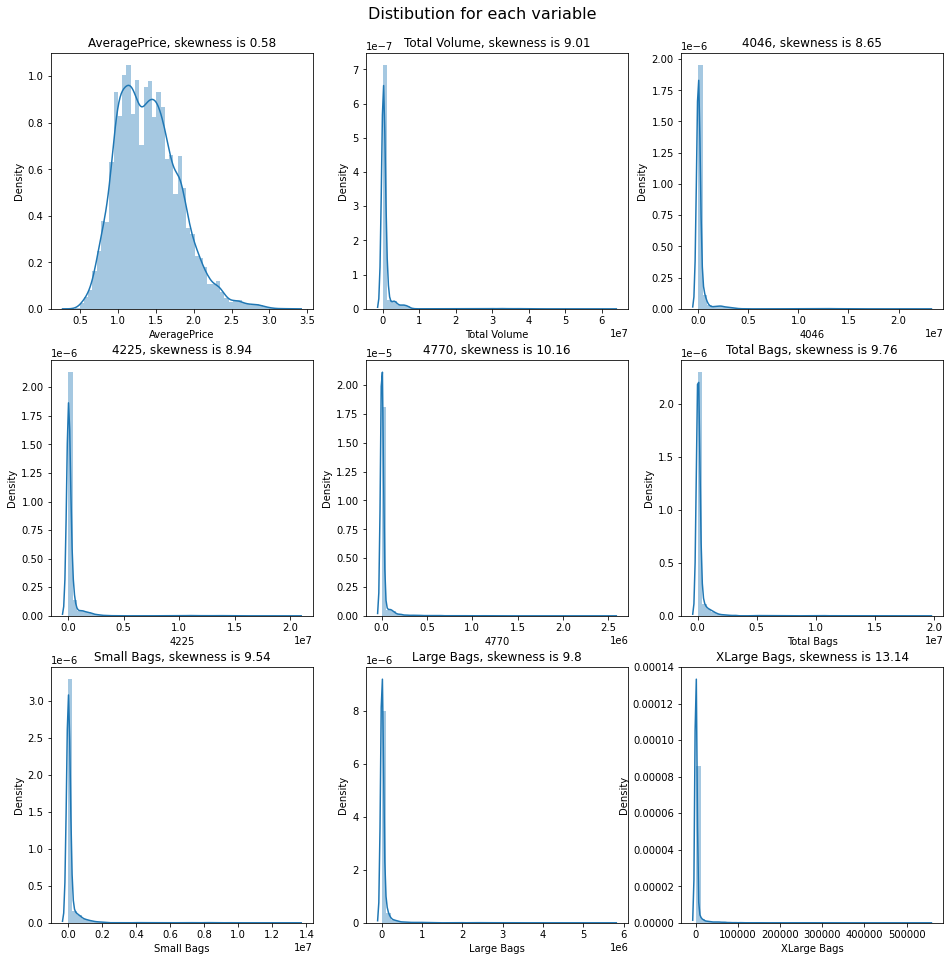

In [21]:
# distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df, columns_list=continuous_columns, rows=3, cols=3, suptitle='Distibution for each variable')

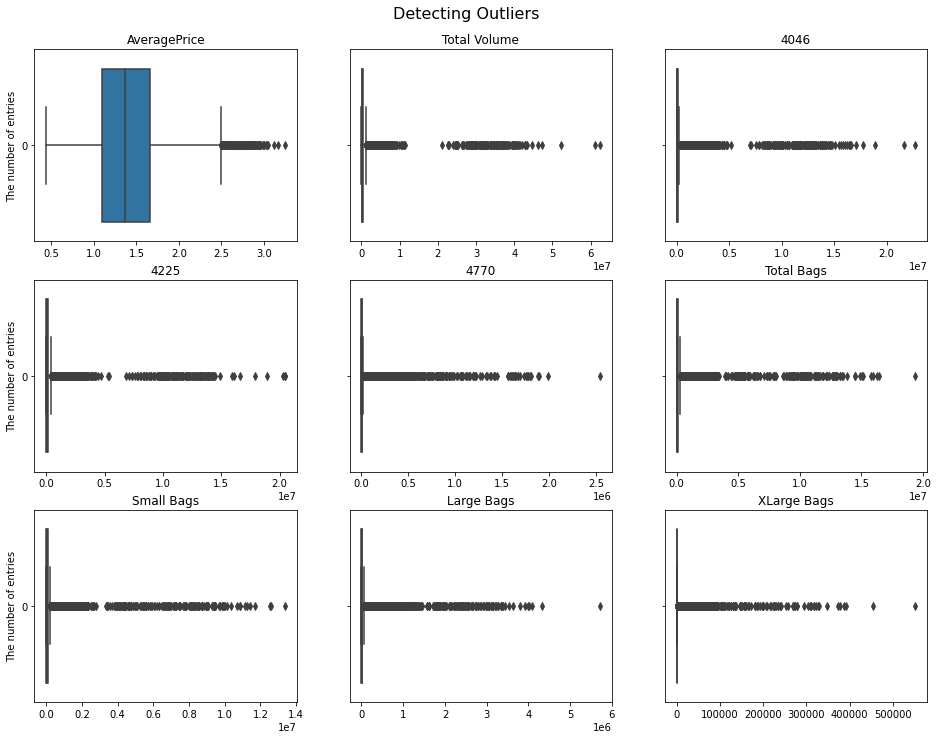

In [22]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=continuous_columns, rows=3, cols=3, suptitle='Detecting Outliers')

## 1. We can see that all the columns have outliers.

In [23]:
df_1=df.copy()

In [24]:
for i in [x for x in continuous_columns if x not in ['AveragePrice']]:
  upperlimit=df_1[i].quantile(0.84)
  lowerlimit=df_1[i].quantile(0.16)
  df_1.loc[df_1[i]>upperlimit,i]=upperlimit
  df_1.loc[df_1[i]<lowerlimit,i]=lowerlimit

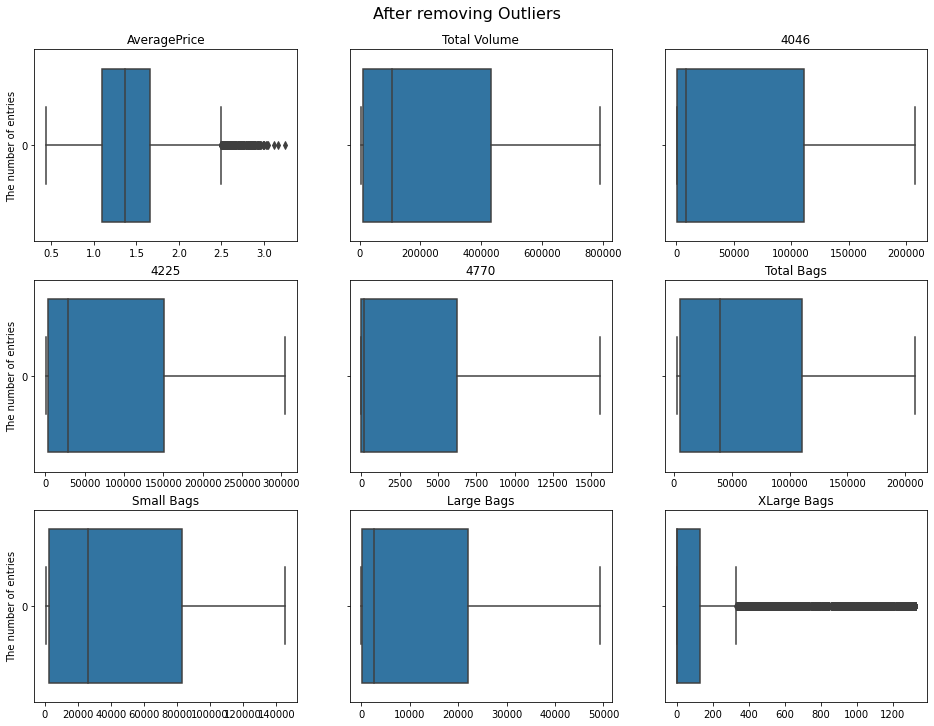

In [25]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df_1, columns_list=continuous_columns, rows=3, cols=3, suptitle='After removing Outliers')

## Observations:
## 1. The outliers of few features are removed.
## 2. The XLarge Bags feature still has high outliers.

In [26]:
df['Large Bags'].value_counts()

0.00         2370
3.33          187
6.67           78
10.00          47
4.44           38
             ... 
239195.91       1
3521.23         1
52.17           1
6935.32         1
16675.91        1
Name: Large Bags, Length: 15082, dtype: int64

## The Reason 'Large Bags' has high outliers is because the value has higher occurence.

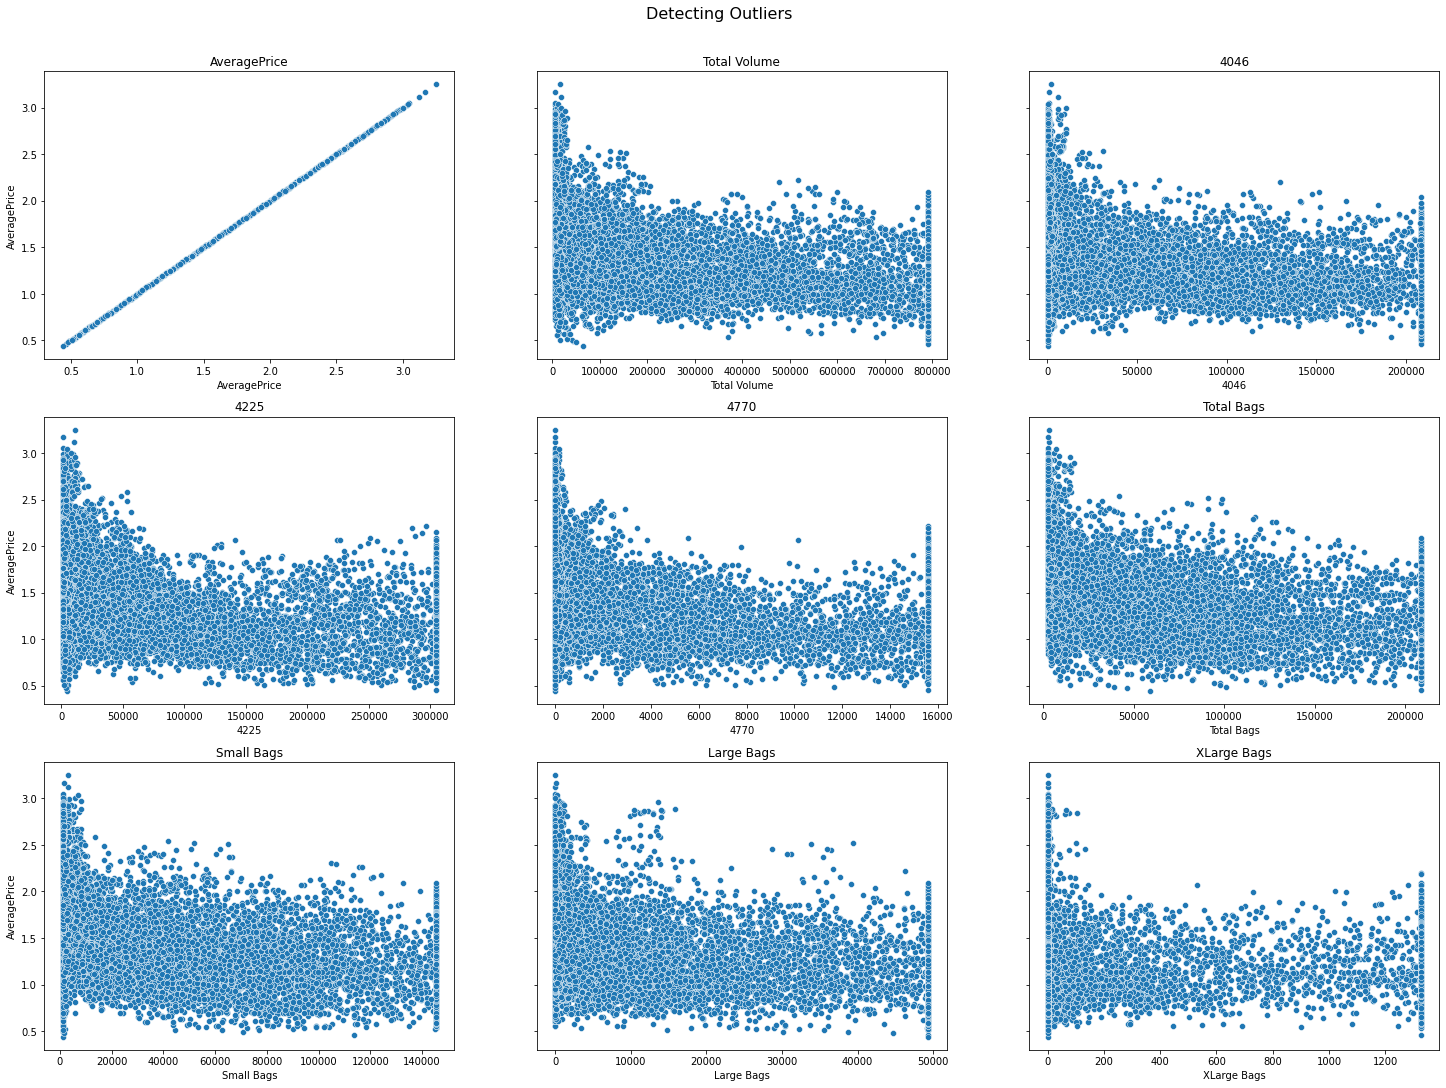

In [27]:
def scatter_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(25,18))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('AveragePrice')
        sns.scatterplot(x=dataset[data],y=dataset['AveragePrice'], ax=axs[i])
        axs[i].set_title(data)
        
scatter_custom(dataset=df_1, columns_list=continuous_columns, rows=3, cols=3, suptitle='Detecting Outliers')

## Transforming the Features to Reduce the Skewness

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt=PowerTransformer(standardize=False)
pt.fit(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]])
df_1[[x for x in continuous_columns if x not in ['AveragePrice']]]=pt.transform(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]])

## Distribution after Transformation

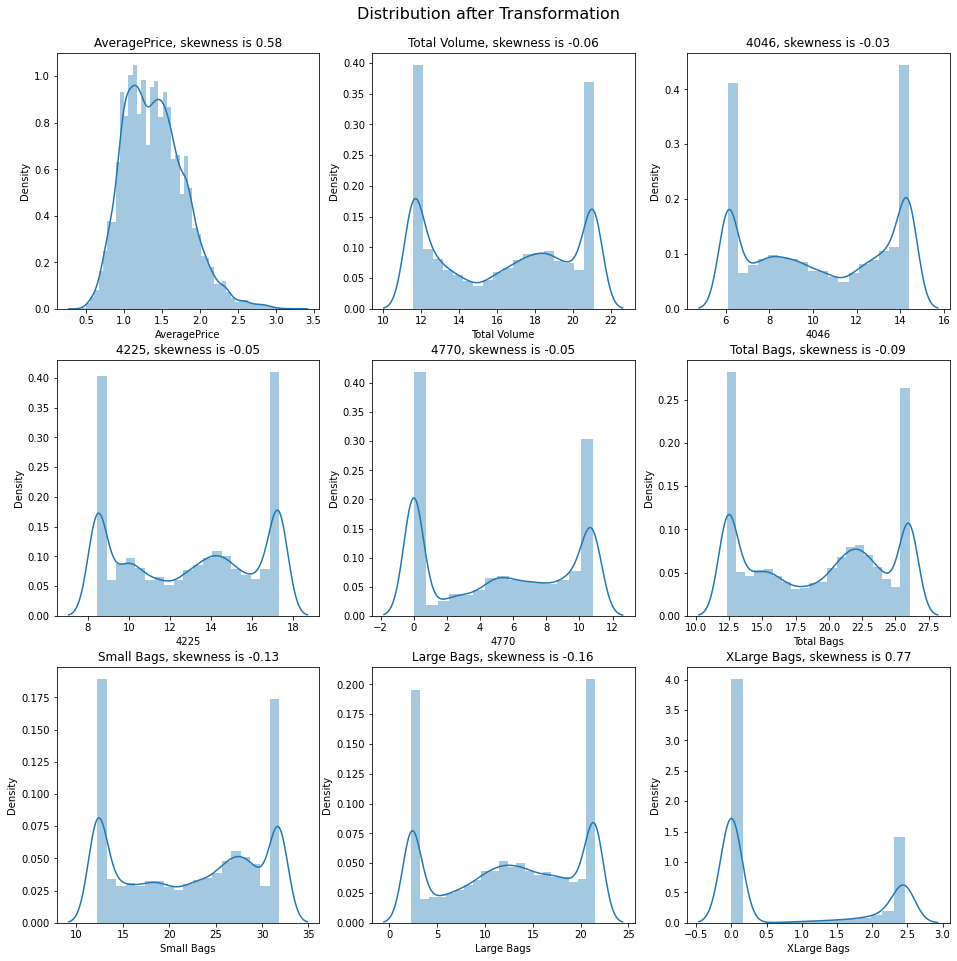

In [30]:
# distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
dist_custom(dataset=df_1, columns_list=continuous_columns, rows=3, cols=3, suptitle='Distribution after Transformation')

## Observations:
## 1.It can be observed that the skewness has reduced significantly after transforming the data, although the features do not follow normal distribution.

### Correlation

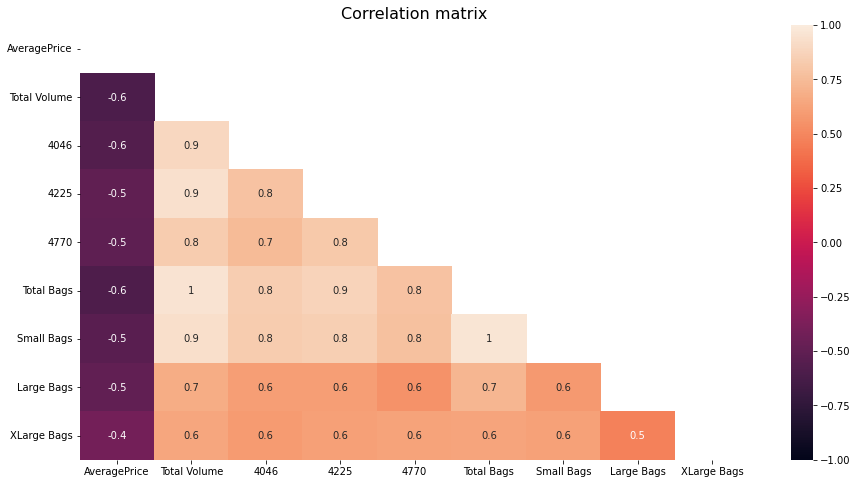

In [31]:
# calculating the correlation matrix
corr = df_1[continuous_columns].corr()
matrix = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)

plt.title('Correlation matrix', size=16)
plt.show()

### Observations:
## 1. There is a high multicollinearity in few features. 

## Removing Redundant Features using Variance Inflation Factor

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = [x for x in continuous_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].columns))]
  
print(vif_data)

        feature          VIF
0  Total Volume  1004.642507
1          4046    82.055086
2          4225   241.888867
3          4770     7.715408
4    Total Bags   732.924926
5    Small Bags   207.873864
6    Large Bags    13.667285
7   XLarge Bags     2.647425


In [33]:
continuous_columns.remove('Total Volume')

In [34]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = [x for x in continuous_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].columns))]
  
print(vif_data)

       feature         VIF
0         4046   44.735392
1         4225   74.848448
2         4770    7.485314
3   Total Bags  368.130072
4   Small Bags  187.136026
5   Large Bags   12.020484
6  XLarge Bags    2.566556


In [35]:
continuous_columns.remove('Total Bags')

In [36]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = [x for x in continuous_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].columns))]
  
print(vif_data)

       feature        VIF
0         4046  42.446010
1         4225  47.190813
2         4770   6.119295
3   Small Bags  52.569916
4   Large Bags   7.412607
5  XLarge Bags   2.541084


In [37]:
continuous_columns.remove('Small Bags')

In [38]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = [x for x in continuous_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].columns))]
  
print(vif_data)

       feature        VIF
0         4046  33.754810
1         4225  33.300333
2         4770   5.947060
3   Large Bags   7.410931
4  XLarge Bags   2.509301


In [39]:
continuous_columns.remove('4046')

In [40]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = [x for x in continuous_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df_1[[x for x in continuous_columns if x not in ['AveragePrice']]].columns))]
  
print(vif_data)

       feature       VIF
0         4225  8.627791
1         4770  5.906697
2   Large Bags  7.118872
3  XLarge Bags  2.497512


In [41]:
df_1.drop(columns=['Total Volume','Total Bags','Small Bags','4046'],inplace=True)

# **For Categorical Columns**

In [42]:
categorical_columns=[x for x in df_1.columns if x not in continuous_columns]

In [43]:
df_1[categorical_columns].nunique()

type       2
year       4
region    54
day       31
month     12
dtype: int64

## Count Plot

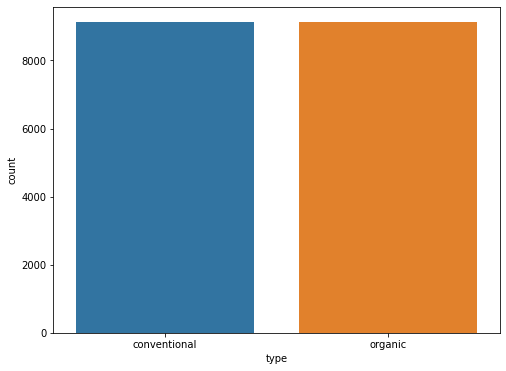

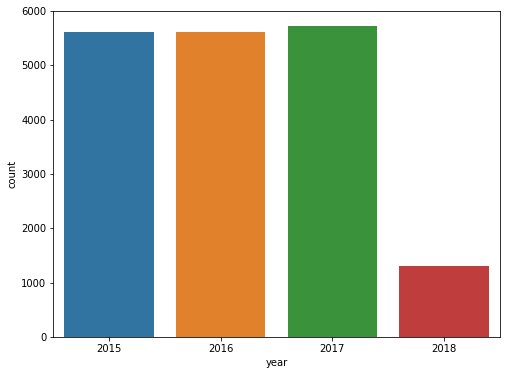

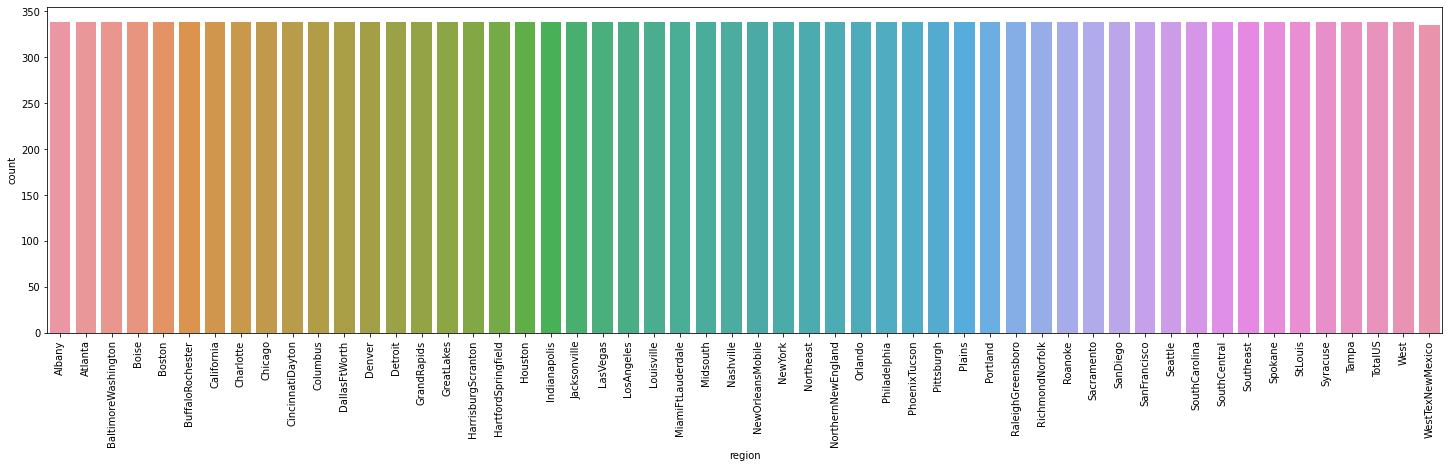

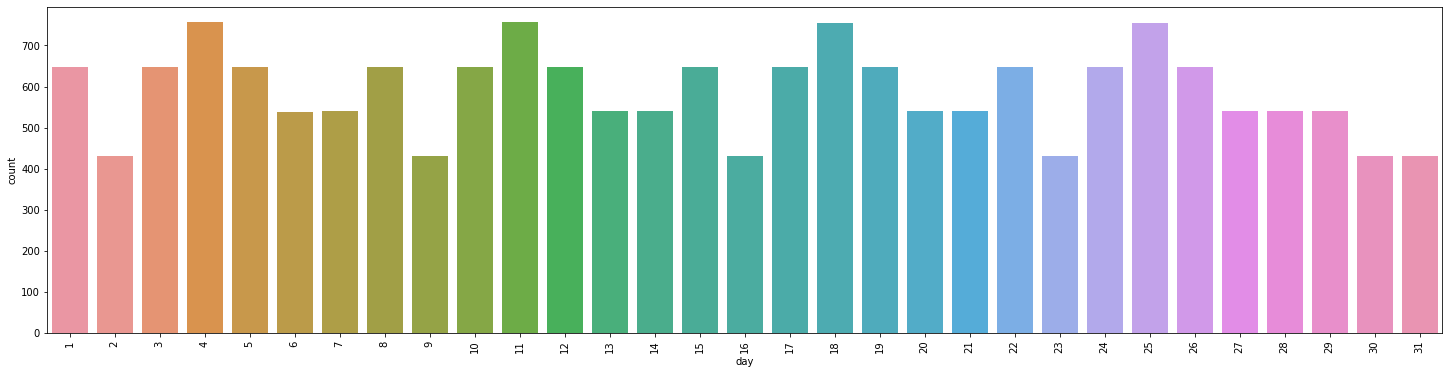

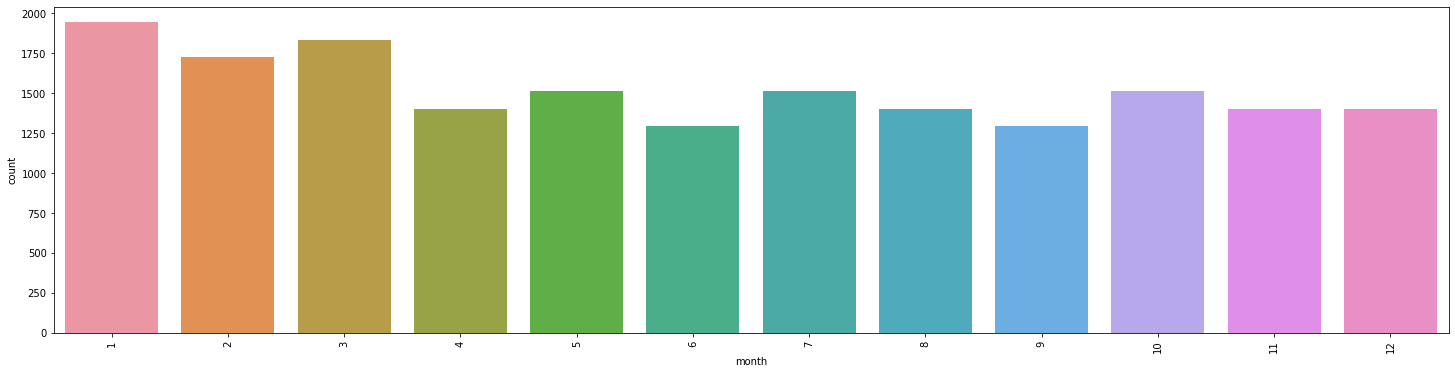

In [44]:
for i in categorical_columns:
  if df_1[i].nunique()<5:
    plt.figure(figsize=(8,6))
    sns.countplot(df_1[i])
    plt.show()
  else:
    plt.figure(figsize=(25,6))
    sns.countplot(df_1[i])
    plt.xticks(rotation=90)
    plt.show()

## Observations:
## 1. The counts of all the regions is equal which means we have sufficient data to take all the regions into consideration.
## 2. There are less records from the year 2018.

## Features Vs Average Price


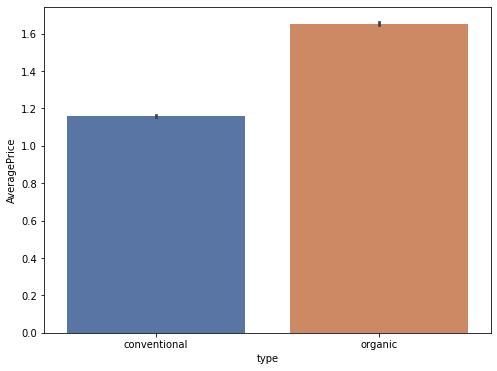

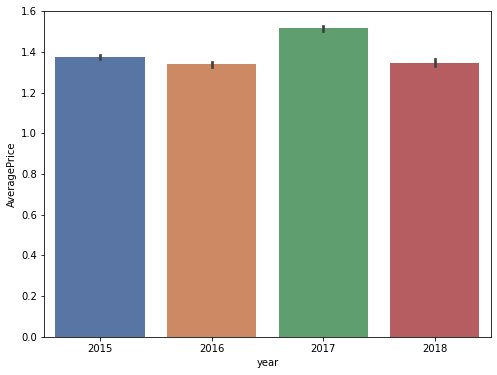

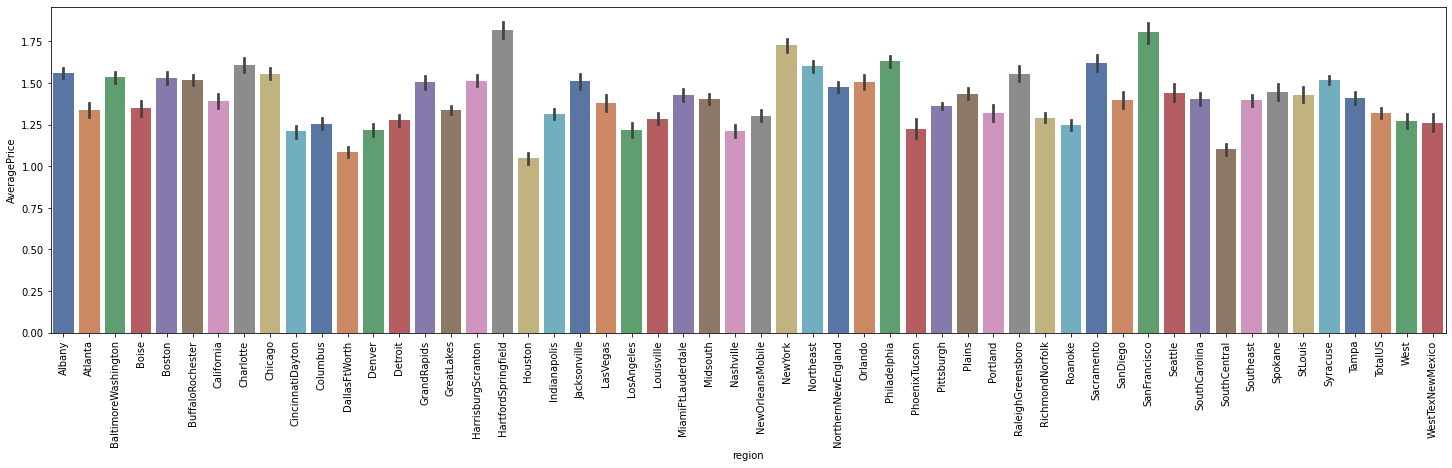

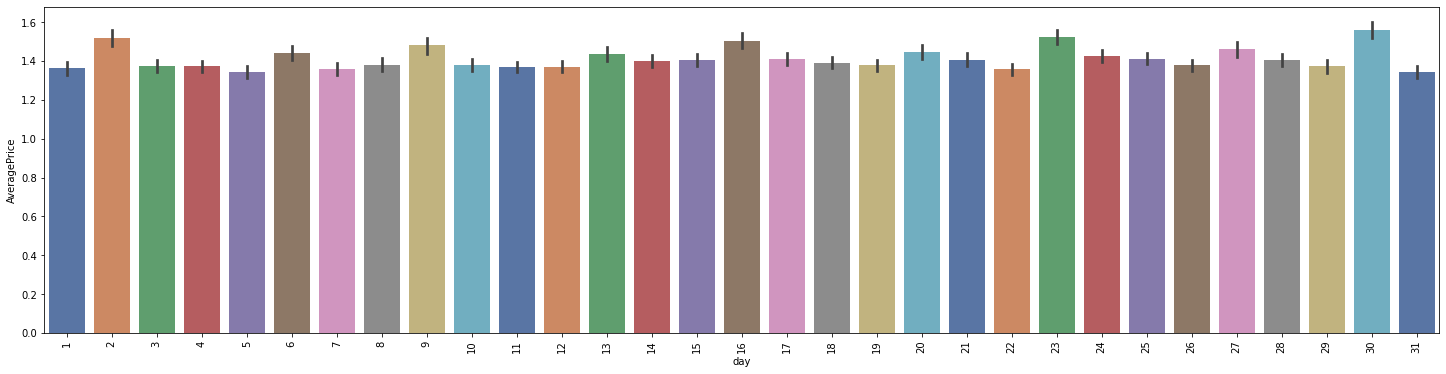

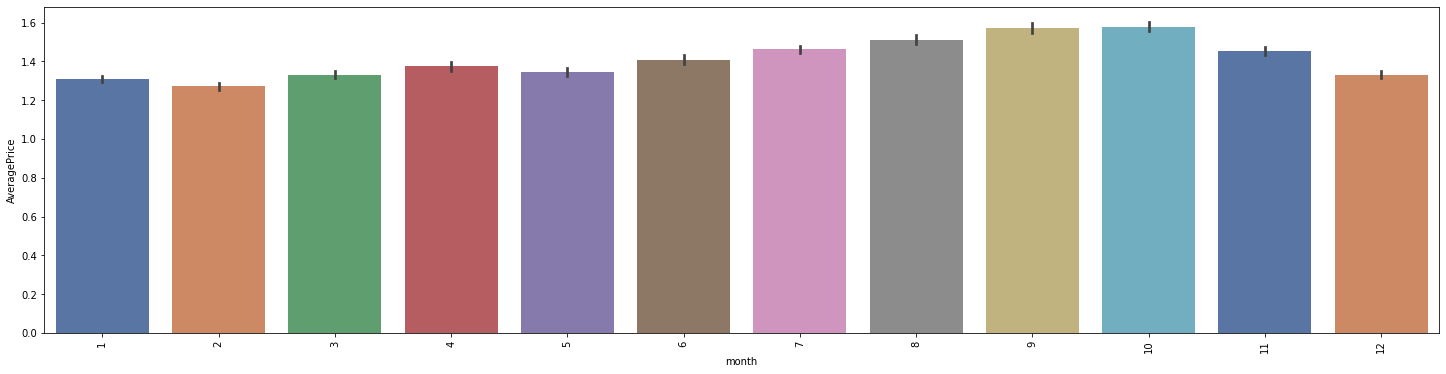

In [45]:
for i in categorical_columns:
  if df_1[i].nunique()<5:
    plt.figure(figsize=(8,6))
    sns.barplot(x=df_1[i],y=df_1['AveragePrice'],palette="deep")
    plt.show()
  else:
    plt.figure(figsize=(25,6))
    sns.barplot(x=df_1[i],y=df_1['AveragePrice'],palette="deep")
    plt.xticks(rotation=90)
    plt.show()

## Observations:
## 1. The average price for organic avacados are high as compared to the conventional
## 2. The year 2017 was the one where the price of avocados were high as compared to the other years.
## 3. Average price has been high in the month of October and November.


## One Hot Encoding

In [ ]:
df_2= pd.get_dummies(df_1, columns = ['type', 'region'])


In [ ]:
df_2.shape

(18249, 64)

In [ ]:
df_2.drop_duplicates().shape

(18249, 64)

## There are no duplicates.

In [ ]:
df_2.head()

,AveragePrice,4225,4770,Large Bags,XLarge Bags,year,day,month,type_conventional,type_organic,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,14.313691,4.074041,5.980066,-0.0,2015,27,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,13.980494,4.280058,6.054675,-0.0,2015,20,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,15.504550,5.161953,6.149799,-0.0,2015,13,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,14.786700,4.516994,6.597412,-0.0,2015,6,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,13.950320,4.563990,7.297309,-0.0,2015,29,11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Feature Selection**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm

## 1. Using Lasso

In [ ]:
X=df_2.drop(columns='AveragePrice')
y=df_2['AveragePrice']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
ls=Lasso(alpha=0.01)
ls.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
ls.coef_

array([-0.00000000e+00, -0.00000000e+00, -8.82610520e-02,  0.00000000e+00,
        5.24702889e-02,  0.00000000e+00,  6.02455323e-02, -1.92859708e-01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  5.35470946e-04,
       -9.00361331e-04,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.05503750e-02,  3.42155341e-03, -9.36099078e-03, -1.10608478e-02,
       -3.55096734e-02, -6.08233039e-03, -6.31248890e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.47100940e-02, -3.80622375e-02,
       -9.47000261e-06,  4.11206641e-03, -0.00000000e+00, -1.49084126e-02,
       -5.92350617e-03,  0.00000000e+00,  1.53542185e-04, -1.31162754e-02,
       -7.26224905e-03,  3.58512318e-02,  2.42811500e-02, -0.00000000e+00,
        4.05804454e-03,  1.83357016e-02, -1.57586894e-02, -0.00000000e+00,
        1.18906804e-03, -5.83986838e-04,  5.57698933e-03, -1.14276757e-02,
       -1.46264893e-02,  4.70150450e-03, -0.00000000e+00,  3.04360702e-02,
        0.00000000e+00,  

In [ ]:
coeff=pd.DataFrame(zip(X.columns,ls.coef_),columns=['column','coefficients'])

In [ ]:
features_after_lasso=list(coeff[coeff['coefficients']!=0]['column'])

In [ ]:
df_after_lasso=df_2[features_after_lasso].copy()

In [ ]:
df_after_lasso.shape

(18249, 36)

## Observation:
## After using the lasso regression, we were able to remove 30 features.

## 1. Linear Regression

In [ ]:
X=df_2[features_after_lasso].copy()
y=df_2['AveragePrice']

In [ ]:
train_score=0
test_score=0
for i in range(0,200):
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=i)
  scaler=MinMaxScaler()
  scaler.fit(X_train)
  X_train=scaler.transform(X_train)
  X_test=scaler.transform(X_test)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  y_train_pred=lr.predict(X_train)
  y_test_pred=lr.predict(X_test)
  train=r2_score(y_train,y_train_pred)
  test=r2_score(y_test,y_test_pred)
  if (train_score<train) and (test_score<test):
    train_score=train
    test_score=test
    random=i
print('Train Score',train_score)
print('Test Score',test_score)
print('Random State',random)




Train Score 0.602667747838211
Test Score 0.5921667879383163
Random State 39


## Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#import the dt regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(max_features=18,max_depth=18)
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=18,
                      max_features=18, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#predicting
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8417813595267939

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7279087551965587

## Decision Tree Regreesor with Grid Search

In [ ]:
param={'max_depth':[11,12,13,14,15,16,17,18,19,20],'max_features':[16,17,18,19,15,14],'min_samples_split':[1,2,3,4],'ccp_alpha':[0.0001,0.001,0.00001,0.000001]}
dt_1=DecisionTreeRegressor()
dt_gscv=GridSearchCV(dt_1, param_grid=param,cv=5, scoring='neg_mean_squared_error')
dt_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ccp_alpha': [0.0001, 0.001, 1e-05, 1e-06],
                         'max_depth': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      

In [ ]:
# checking the best parameters
dt_gscv.best_params_

{'ccp_alpha': 1e-05,
 'max_depth': 19,
 'max_features': 16,
 'min_samples_split': 3}

In [ ]:
#predicting
y_train_pred=dt_gscv.predict(X_train)
y_test_pred=dt_gscv.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8206362767885014

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7271847352286511

## **3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=144)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
rf=RandomForestRegressor(ccp_alpha=1e-09,max_depth=20,max_features=8,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=1e-09, criterion='mse',
                      max_depth=20, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#predicting
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8544625605531377

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.8020511343323753

In [ ]:
param={'max_depth':[21,22,23,24],'max_features':[13,12,11,15,14,10,9,14],'ccp_alpha':[0.00001,0.000001,1e-08,1e-09,1e-10,1e-11]}
rf_1=RandomForestRegressor(n_estimators=100)
rf_gscv=GridSearchCV(rf_1, param_grid=param,cv=5, scoring='neg_mean_squared_error')
rf_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#predicting
y_train_pred=rf_gscv.predict(X_train)
y_test_pred=rf_gscv.predict(X_test)

In [ ]:
rf_gscv.best_params_

{'ccp_alpha': 1e-06, 'max_depth': 24, 'max_features': 9}

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8955357726805818

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7986364477667021

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=142)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:

# Creating adaboost classifier model
adb = AdaBoostRegressor(loss='linear',base_estimator=ExtraTreesRegressor(n_estimators= 30,
                               criterion= 'mse',
                               max_features = 'sqrt',
                               min_samples_split = 3,
                               random_state = 40))
adb_model = adb.fit(X_train,y_train)

In [ ]:
#predicting
y_train_pred=adb_model.predict(X_train)
y_test_pred=adb_model.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9324181770464203

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7816610775983817

## AdaBoost With Grid Search CV

In [ ]:
param={'loss':['linear','exponential','square'],'base_estimator':[ExtraTreesRegressor(),RandomForestRegressor()]}
adb_1=AdaBoostRegressor(n_estimators=50)
adb_gscv=GridSearchCV(adb_1, param_grid=param,cv=3, scoring='neg_mean_squared_error')
adb_gscv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [ExtraTreesRegressor(bootstrap=False,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                                                                max_features='auto',
                                                                max_leaf_nodes=None,
                                                                max_samples=None,
                                                                min_...
                                                            

In [ ]:
adb_gscv.best_params_

{'base_estimator': ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False),
 'loss': 'linear'}

In [ ]:
#predicting
y_train_pred=adb_gscv.predict(X_train)
y_test_pred=adb_gscv.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9294396080618826

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7696305949907739

# **Saving The Model**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=144)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
rf=RandomForestRegressor(ccp_alpha=1e-09,max_depth=20,max_features=8,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=1e-09, criterion='mse',
                      max_depth=20, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#predicting
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [ ]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9052183238287207

In [ ]:
# r2 for test
r2_score(y_test,y_test_pred)

0.8252807808639058

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf)
 
# Load the pickled model
svm_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
svm_from_pickle.predict(X_test)

array([1.22482495, 1.30186746, 0.96856023, ..., 1.40451184, 1.10405481,
       1.30288458])

# ---------------------------------------------------------------------
# --------------------------------------------------------------------- 



# For The Regions.

## **So from the previous problem, we can continue from df_1.**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [47]:
df_1.head()

,AveragePrice,4225,4770,Large Bags,XLarge Bags,type,year,region,day,month
0,1.33,14.313691,4.074041,5.980066,-0.0,conventional,2015,Albany,27,12
1,1.35,13.980494,4.280058,6.054675,-0.0,conventional,2015,Albany,20,12
2,0.93,15.504550,5.161953,6.149799,-0.0,conventional,2015,Albany,13,12
3,1.08,14.786700,4.516994,6.597412,-0.0,conventional,2015,Albany,6,12
4,1.28,13.950320,4.563990,7.297309,-0.0,conventional,2015,Albany,29,11


In [50]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_1['region']= label_encoder.fit_transform(df['region'])
 
df_1['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [51]:
df_1=pd.get_dummies(df_1, columns=['type'])

In [54]:
df_1.drop(columns='type_conventional',inplace=True)

In [55]:
df_1

,AveragePrice,4225,4770,Large Bags,XLarge Bags,year,region,day,month,type_organic
0,1.33,14.313691,4.074041,5.980066,-0.0,2015,0,27,12,0
1,1.35,13.980494,4.280058,6.054675,-0.0,2015,0,20,12,0
2,0.93,15.504550,5.161953,6.149799,-0.0,2015,0,13,12,0
3,1.08,14.786700,4.516994,6.597412,-0.0,2015,0,6,12,0
4,1.28,13.950320,4.563990,7.297309,-0.0,2015,0,29,11,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,8.782989,0.000000,8.799273,-0.0,2018,53,4,2,1
18245,1.71,9.952559,0.000000,8.235521,-0.0,2018,53,28,1,1
18246,1.87,9.461145,7.114979,4.722410,-0.0,2018,53,21,1,1
18247,1.93,9.745635,7.113494,4.977465,-0.0,2018,53,14,1,1


In [197]:
X=df_1.drop(columns='region')
y=df_1['region']

In [169]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [170]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [192]:
log=LogisticRegression(multi_class='multinomial',penalty='l1',C=10,solver='saga')
log.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
#predicting
y_train_pred=log.predict(X_train)
y_test_pred=log.predict(X_test)

In [194]:
accuracy_score(y_train,y_train_pred)

0.26545374835598423

In [195]:
accuracy_score(y_test,y_test_pred)

0.2627657243041858

In [196]:
print("Precision Score : ",precision_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.2627657243041858
Recall Score :  0.2627657243041858


In [97]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

In [98]:
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)

In [143]:
lg=DecisionTreeClassifier(max_features=8,max_depth=12)
lg.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [144]:
#predicting
y_train_pred=lg.predict(X_train)
y_test_pred=lg.predict(X_test)

In [145]:
accuracy_score(y_train,y_train_pred)

0.635905304690925

In [146]:
accuracy_score(y_test,y_test_pred)

0.47161954854262544

In [147]:
print("Precision Score : ",precision_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.47161954854262544
Recall Score :  0.47161954854262544


In [149]:
from sklearn.model_selection import StratifiedKFold

In [159]:
dt_1=DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=3)
param={'max_depth':[10,11,12,13,14,15,16],'min_samples_leaf':[3,4,5,6,7],'max_features':[2,3,4,5,6],'ccp_alpha':[0.0001,0.00001,0.01,0.0000001,1]}
dt_s_gscv=GridSearchCV(dt_1,param_grid=param,cv=cv,scoring='f1_micro')
dt_s_gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [160]:
y_train_pred=dt_s_gscv.predict(X_train)
y_test_pred=dt_s_gscv.predict(X_test)

In [161]:
dt_s_gscv.best_params_

{'ccp_alpha': 1e-05, 'max_depth': 16, 'max_features': 6, 'min_samples_leaf': 4}

In [162]:
accuracy_score(y_train,y_train_pred)

0.7430220663451702

In [163]:
accuracy_score(y_test,y_test_pred)

0.5079991233837388

In [164]:
print("Precision Score : ",precision_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_test_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.5079991233837388
Recall Score :  0.5079991233837388
